Context:

An automobile company has divided the costumers into 4 segments(A, B, C, D). The goal is to use the data to be able to classify people within these segments

In [121]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [122]:
data = pd.read_csv('./data.csv')

In [123]:
data.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [124]:
data.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

converting the categorical data to numerical:

In [125]:
data.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [126]:
data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [127]:
print(data.Profession.unique().tolist())
print(data.Spending_Score.unique().tolist())
print(data.Var_1.unique().tolist())


['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist', 'Executive', 'Doctor', 'Homemaker', 'Marketing', nan]
['Low', 'Average', 'High']
['Cat_4', 'Cat_6', 'Cat_7', 'Cat_3', 'Cat_1', 'Cat_2', nan, 'Cat_5']


In [128]:
def convert(dt):
    dt['Profession']     = dt.Profession.replace(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist', 'Executive', 'Doctor', 'Homemaker', 'Marketing'],[0, 1, 2, 3, 4, 5, 6, 7, 8])
    dt['Spending_Score'] = dt.Spending_Score.replace(['Low', 'Average', 'High'], [0, 1, 2])
    dt['Var_1']          = dt.Var_1.replace(['Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7'], [0, 1, 2, 3, 4, 5, 6])
    dt['Gender']         = dt['Gender'].replace('Female', 0)
    dt['Gender']         = dt['Gender'].replace('Male', 1)


    a = pd.get_dummies(dt['Ever_Married'], prefix='Ever')
    dt = pd.concat([dt, a], axis=1)
    dt = dt.drop(columns=['Ever_Married', 'Ever_No'], axis=1)
    dt.rename(columns={'Ever_Yes': 'Ever_Married'}, inplace=True)

    a = pd.get_dummies(dt['Graduated'], prefix='Grad')
    dt = pd.concat([dt, a], axis=1)
    dt = dt.drop(columns=['Graduated', 'Grad_No'], axis=1)
    dt.rename(columns={'Grad_Yes': 'Graduated'}, inplace=True)

    return dt

data = convert(data)

filling the null values:

In [129]:
print('mean age: ', round(data.Age.mean(), 0))
print('modes: ')
print(data.mode().head(1))


mean age:  43.0
modes: 
       ID  Gender   Age  Profession  Work_Experience  Spending_Score  \
0  458982     1.0  35.0         4.0              1.0             0.0   

   Family_Size  Var_1 Segmentation  Ever_Married  Graduated  
0          2.0    5.0            D           1.0        1.0  


In [130]:
def fill(dt):
    dt['Gender']            = dt['Gender'].fillna(1)
    dt['Age']               = dt['Age'].fillna(43)
    dt['Profession']        = dt['Profession'].fillna(4)
    dt['Work_Experience']   = dt['Work_Experience'].fillna(1)
    dt['Spending_Score']    = dt['Spending_Score'].fillna(0)
    dt['Family_Size']       = dt['Family_Size'].fillna(2)
    dt['Var_1']             = dt['Var_1'].fillna(5)
    dt['Ever_Married']      = dt['Ever_Married'].fillna(1)
    dt['Graduated']         = dt['Graduated'].fillna(1)

    return dt

data = fill(data)
data = data.reset_index()

In [131]:
data.isnull().sum()

index              0
ID                 0
Gender             0
Age                0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
Ever_Married       0
Graduated          0
dtype: int64

creating visualizations for the analysis:

<AxesSubplot:xlabel='Segmentation', ylabel='Age'>

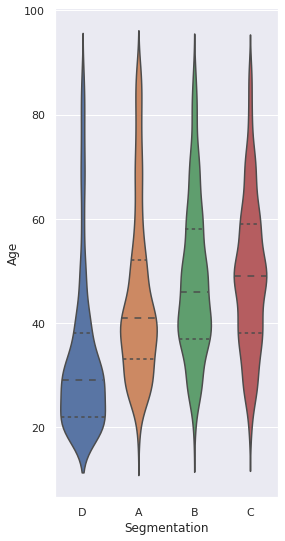

In [132]:
sns.set(rc = {'figure.figsize':(4,9)})
sns.violinplot(data=data, y='Age', x='Segmentation', inner='quartile')

finding: segmentation appears to be to a lesser extent associated with age

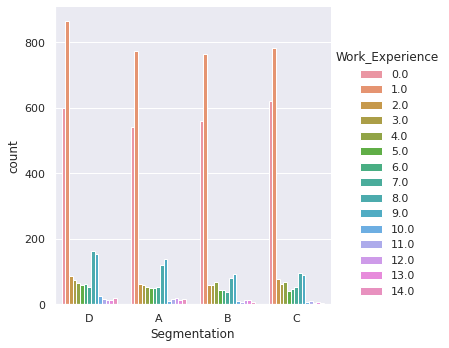

In [133]:
sns.set(rc = {'figure.figsize':(6,5)})
sns.catplot(data=data, x='Segmentation', hue='Work_Experience', kind='count')

finding: does not appear to be related

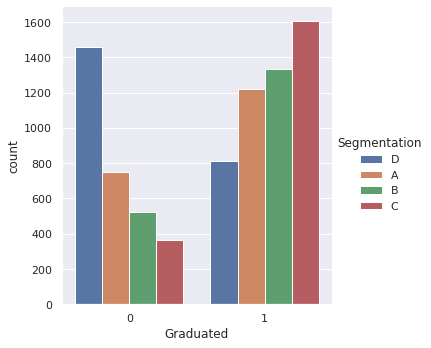

In [134]:
sns.catplot(data=data, x='Graduated', hue='Segmentation', kind='count')

finding: clear correlation

<AxesSubplot:xlabel='Segmentation', ylabel='Family_Size'>

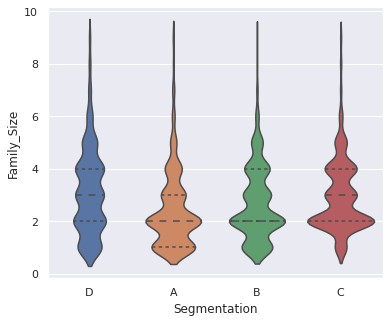

In [135]:
sns.violinplot(data=data, x='Segmentation', y='Family_Size', inner='quartile')

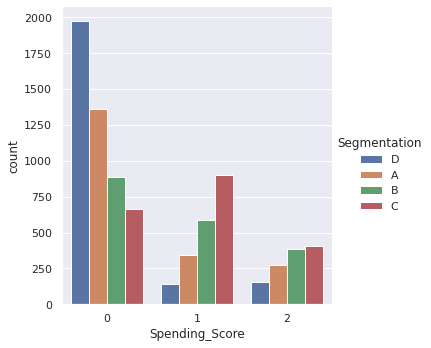

In [136]:
sns.catplot(data=data, x='Spending_Score', hue='Segmentation', kind='count')

finding: clear correlation

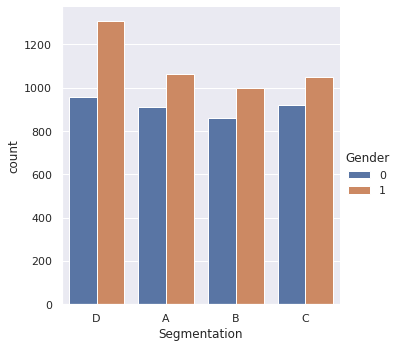

In [137]:
sns.catplot(data=data, x='Segmentation',hue='Gender', kind='count')

finding: segmentation D seems to have an important difference in gender

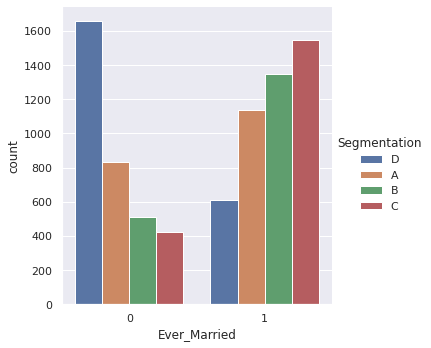

In [138]:
sns.catplot(data=data, x='Ever_Married', hue='Segmentation', kind='count')

finding: clear correlation

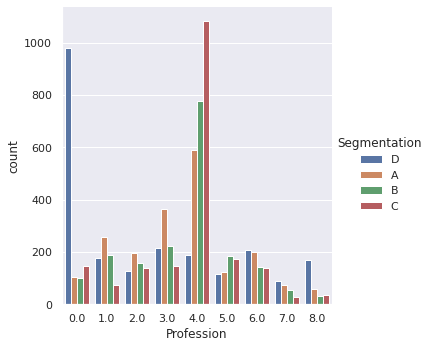

In [139]:
sns.catplot(data=data, x='Profession', hue='Segmentation', kind='count')

finding: some professions are much more defined towards certain segmentation

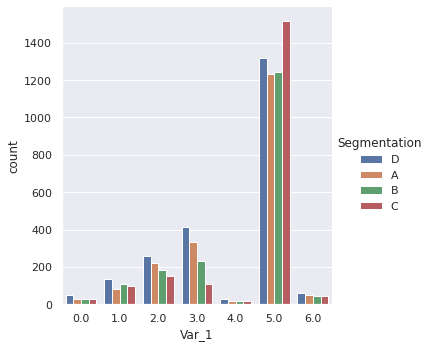

In [140]:
sns.catplot(data=data, x='Var_1', hue='Segmentation', kind='count')

finding: dont seem to be related

In [141]:
data['Segmentation'] = data.Segmentation.replace(['A', 'B', 'C', 'D'], [0, 1, 2, 3])

looking for the best model:

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier)

In [143]:
X_data = data[['Gender', 'Age', 'Profession', 'Spending_Score', 'Ever_Married', 'Graduated']]
y_data = data['Segmentation']

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=1)

In [144]:
def models(model):
    m = model
    m.fit(X_train, y_train)
    pred = m.predict(X_test)
    print(model, accuracy_score(pred, y_test))

In [145]:
for model in [LogisticRegression(), KNeighborsClassifier(n_neighbors=4), RandomForestClassifier(), GradientBoostingClassifier(), BaggingClassifier()]:
    models(model)

/home/user/miniconda3/envs/sklearn/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression() 0.4667492771581991
KNeighborsClassifier(n_neighbors=4) 0.453118546055349
RandomForestClassifier() 0.48244527054935976
GradientBoostingClassifier() 0.5287071458075175
BaggingClassifier() 0.4745972738537794


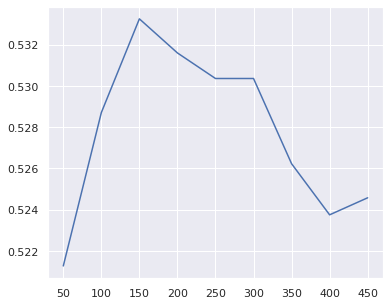

In [147]:
n_e = []
for n in range(50, 500, 50):
    model = GradientBoostingClassifier(n_estimators=n)
    model.fit(X_train, y_train)

    pred = model.predict(X_test)
    acc = accuracy_score(pred, y_test)
    n_e.append(acc)

plt.plot(range(50, 500, 50), n_e)


GradientBoostingClassifier(n_estimators=150) 0.5332507228418009


<AxesSubplot:>

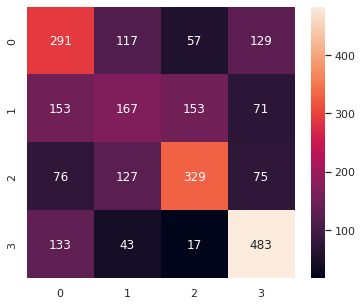

In [148]:
models(GradientBoostingClassifier(n_estimators=150))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d')

it is not the best classification job, I consider more features are needed to improve it